In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import time
from sklearn.cluster import KMeans
from pylab import rcParams



%matplotlib inline
rcParams['figure.figsize'] = 20, 15
rcParams['lines.linewidth'] = 2

# Additional Materials

## Some Python Syntax

### Lambda function
- 限制較多的 function definition

In [2]:
f = lambda x: x + 1
f(1)


2

等同於

In [3]:
def f(x):
    return x + 1
f(1)

2

### Unpack

In [4]:
def f(a, b, c, d):
    return a + b + c + d
print(f(1, 2, 3, 4))

l = [1, 2, 3, 4]
print(f(*l))
# f(l) -> TypeError: f() missing 3 required positional arguments: 'b', 'c', and 'd'

10
10


### Zip

transposed matrix

In [5]:
l_tmp = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
print("l_tmp = ")
for i in l_tmp:
    print(i)
l = list(l_tmp)
print("l = ")
for i in l:
    print(i)
z_tmp = list(zip(l))
print("z_tmp = ")
for i in z_tmp:
    print(i)
z = list(zip([1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]))
print("z = ")
for i in z:
    print(i)
print("zip(l_tmp) = ")
for i in zip(l_tmp):
    print(i)
print("zip(*l_tmp) = ")
for i in zip(*l_tmp):
    print(i)
print("zip([1, 2, 3 , 4], ...) = ")
for i in zip([1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]):
    print(i)

print("=====================")
print(list(zip(*l_tmp)))
for i in list(zip(*l_tmp)):
    print(i)
    print(type(i))

l_tmp = 
[1, 2, 3, 4]
[5, 6, 7, 8]
[9, 10, 11, 12]
l = 
[1, 2, 3, 4]
[5, 6, 7, 8]
[9, 10, 11, 12]
z_tmp = 
([1, 2, 3, 4],)
([5, 6, 7, 8],)
([9, 10, 11, 12],)
z = 
(1, 5, 9)
(2, 6, 10)
(3, 7, 11)
(4, 8, 12)
zip(l_tmp) = 
([1, 2, 3, 4],)
([5, 6, 7, 8],)
([9, 10, 11, 12],)
zip(*l_tmp) = 
(1, 5, 9)
(2, 6, 10)
(3, 7, 11)
(4, 8, 12)
zip([1, 2, 3 , 4], ...) = 
(1, 5, 9)
(2, 6, 10)
(3, 7, 11)
(4, 8, 12)
[(1, 5, 9), (2, 6, 10), (3, 7, 11), (4, 8, 12)]
(1, 5, 9)
<class 'tuple'>
(2, 6, 10)
<class 'tuple'>
(3, 7, 11)
<class 'tuple'>
(4, 8, 12)
<class 'tuple'>


In [6]:
l2d = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
l2d_T = list(zip(*l2d))
print(l2d_T)

[(1, 5, 9), (2, 6, 10), (3, 7, 11), (4, 8, 12)]


## IPython
- Enhanced Python Interpreter
- Provide Useful Functions
- Timing, AutoComplete, System shell commands ...etc

### 計時

In [7]:
%timeit [0 for i in range(10000)]

246 µs ± 20.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
%timeit [0] * 10000

19.9 µs ± 420 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%%timeit 
a, b = 1, 2
a, b = b, a

21.6 ns ± 0.58 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [10]:
%%timeit
a, b = 1, 2
c = a
b = c
a = b

25.1 ns ± 0.824 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### 列出變數

In [11]:
a, b = 1, 2
%whos

Variable   Type        Data/Info
--------------------------------
KMeans     type        <class 'sklearn.cluster.k_means_.KMeans'>
a          int         1
b          int         2
f          function    <function f at 0x7f4102f63378>
i          tuple       n=3
l          list        n=3
l2d        list        n=3
l2d_T      list        n=4
l_tmp      list        n=3
np         module      <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
pd         module      <module 'pandas' from '/h<...>ages/pandas/__init__.py'>
plt        module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
pprint     module      <module 'pprint' from '/h<...>lib/python3.6/pprint.py'>
rcParams   RcParams    _internal.classic_mode: F<...>: 0.6\nytick.right: False
time       module      <module 'time' (built-in)>
z          list        n=4
z_tmp      list        n=3


In [12]:
%whos int

Variable   Type    Data/Info
----------------------------
a          int     1
b          int     2


### 直接執行 shell script

In [13]:
!cat demo.py

#! /usr/bin/env python3.6
for i in range(5):
    print(i)


### 執行 Python 檔

In [14]:
%run demo.py

0
1
2
3
4


In [15]:
print(i)

4


In [16]:
#while True:
#    pass

#You can press "ii" to interrupt the program.

##  Jupyter
- A GUI for IPython (Ruby, Julia ...etc)
- Press h to show/change the shortcuts
- Two Mode: Command Mode (ESC) / Edit Mode (Enter)
- Execute the cells
    - Ctrl-Enter: Run the cells
    - Shift-Enter: Run thecells, select below
    - Alt-Enter: Run thecells, insert below.
- Command Mode:
	- Delete Cell: dd
	- Copy Cell: c
	- Clip Cell: x
	- Paste Cell: v
	- Undo Delete Cell: z
	- Move Up & Down: j/Down & k/Up
	- Append Cell Above/Below: a/b
	- Interrupt Kernel: ii
	- ...etc

##  Pandasql
- Use SQL in pandas.

In [17]:
import pandasql as pdsql
import pandas as pd

In [18]:
pysql = lambda x: pdsql.sqldf(x, globals())

def pysql(x):
    return pdsql.sqldf(x, globals())
df = pd.DataFrame([['A', 18, 170], ['B', 18, 180], ['C', 19, 175], ['D', 19, 185]], columns=["Name", "Age", "Height"])

df1 = pysql("select Age, avg(Height) from df group by Age")
#會從globals()這個dict裡面查找df這個變數的value
df1.head()

,Age,avg(Height)
0,18,175.0
1,19,180.0


In [19]:
df1 = pysql("select Name, avg(Height) from df group by Height")
#會從globals()這個dict裡面查找df這個變數的value
df1.head()

,Name,avg(Height)
0,A,170.0
1,C,175.0
2,B,180.0
3,D,185.0


# Data 1 - PM2.5

In [20]:
data = pd.read_csv("PM2.5.csv")

In [21]:
data.head(10)

,record_id,device_id,DateTime,PM25,PM10,PM1,Temperature,Humidity,lat,lon
0,12773,28C2DDDD415C,2017-03-01 08:30:00,43,0,0,19.61,96,23.741,120.755
1,12774,28C2DDDD415C,2017-03-01 09:00:00,41,0,0,19.81,94,23.741,120.755
2,12775,28C2DDDD415C,2017-03-01 09:30:00,41,0,0,19.73,93,23.741,120.755
3,12776,28C2DDDD415C,2017-03-01 10:00:00,47,0,0,19.17,92,23.741,120.755
4,12777,28C2DDDD415C,2017-03-01 10:30:00,50,0,0,19.90,91,23.741,120.755
5,12778,28C2DDDD415C,2017-03-01 11:00:00,44,0,0,20.09,90,23.741,120.755
6,12779,28C2DDDD415C,2017-03-01 11:30:00,39,0,0,20.82,90,23.741,120.755
7,12780,28C2DDDD415C,2017-03-01 12:00:00,48,0,0,21.23,87,23.741,120.755
8,12781,28C2DDDD415C,2017-03-01 12:30:00,45,0,0,21.35,86,23.741,120.755
9,12782,28C2DDDD415C,2017-03-01 13:00:00,48,0,0,21.62,85,23.741,120.755


In [22]:
data.describe()

,record_id,PM25,PM10,PM1,Temperature,Humidity,lat,lon
count,1.250443e+06,1.250443e+06,1.250443e+06,1.250443e+06,1.250443e+06,1.250443e+06,1.250443e+06,1.250443e+06
mean,9.632778e+05,4.379018e+01,5.053475e+01,2.839685e+01,2.521184e+01,7.575035e+01,2.361421e+01,1.205810e+02
std,4.340908e+05,2.036245e+01,2.876265e+01,1.644278e+01,3.560814e+00,1.356982e+01,7.559487e-01,3.650899e-01
min,1.277300e+04,1.000000e+00,0.000000e+00,0.000000e+00,6.480000e+00,-7.200000e+01,2.247800e+01,1.200880e+02
25%,6.173355e+05,3.200000e+01,3.200000e+01,2.000000e+01,2.278000e+01,6.600000e+01,2.294400e+01,1.203110e+02
50%,9.668550e+05,4.300000e+01,5.300000e+01,2.900000e+01,2.550000e+01,7.500000e+01,2.353100e+01,1.205440e+02
75%,1.307714e+06,5.400000e+01,7.000000e+01,3.700000e+01,2.775000e+01,8.500000e+01,2.417900e+01,1.206880e+02
max,1.727170e+06,6.950000e+02,1.740000e+03,5.670000e+02,5.262000e+01,1.440000e+02,2.499900e+01,1.218530e+02


將不正常的濕度值改至正常範圍內

In [23]:
#Set 100 for those Humidity > 100
#Set 0 for those Humidity < 0
#data.loc[$param1, $param2]
#$param1 : select row
#$param2 : select column
data.loc[data.Humidity > 100, 'Humidity'] = 100
data.loc[data.Humidity < 0, 'Humidity'] = 0

In [24]:
data.describe()

,record_id,PM25,PM10,PM1,Temperature,Humidity,lat,lon
count,1.250443e+06,1.250443e+06,1.250443e+06,1.250443e+06,1.250443e+06,1.250443e+06,1.250443e+06,1.250443e+06
mean,9.632778e+05,4.379018e+01,5.053475e+01,2.839685e+01,2.521184e+01,7.573173e+01,2.361421e+01,1.205810e+02
std,4.340908e+05,2.036245e+01,2.876265e+01,1.644278e+01,3.560814e+00,1.351005e+01,7.559487e-01,3.650899e-01
min,1.277300e+04,1.000000e+00,0.000000e+00,0.000000e+00,6.480000e+00,0.000000e+00,2.247800e+01,1.200880e+02
25%,6.173355e+05,3.200000e+01,3.200000e+01,2.000000e+01,2.278000e+01,6.600000e+01,2.294400e+01,1.203110e+02
50%,9.668550e+05,4.300000e+01,5.300000e+01,2.900000e+01,2.550000e+01,7.500000e+01,2.353100e+01,1.205440e+02
75%,1.307714e+06,5.400000e+01,7.000000e+01,3.700000e+01,2.775000e+01,8.500000e+01,2.417900e+01,1.206880e+02
max,1.727170e+06,6.950000e+02,1.740000e+03,5.670000e+02,5.262000e+01,1.000000e+02,2.499900e+01,1.218530e+02


# Association Rules
- Transaction Definition
- Observation & Discretization
- Assocation Rules
- Explanation



##  Task 1 - (PM2.5, Temperature, Humidity)

### Step 1: Transaction Definition
找出 PM2.5, Temperature & Humidity 之間的關係

In [25]:
# q1 = data[['Temperature', 'Humidity', 'device_id', 'PM25', 'record_id']]
#drop() : truncate those no-need column
q1 = data.drop(['DateTime', 'PM10', 'PM1', 'lat', 'lon'], axis=1)
q1.head()

,record_id,device_id,PM25,Temperature,Humidity
0,12773,28C2DDDD415C,43,19.61,96
1,12774,28C2DDDD415C,41,19.81,94
2,12775,28C2DDDD415C,41,19.73,93
3,12776,28C2DDDD415C,47,19.17,92
4,12777,28C2DDDD415C,50,19.90,91


### Step 2: Observation & Discretization
觀察3個特徵的分佈

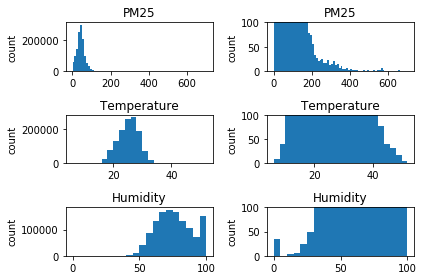

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=2)
ax[0][0].hist(q1['PM25'], bins=range(min(q1['PM25']), max(q1['PM25']) + 10, 10))
ax[0][0].set_title('PM25')
ax[0][0].set_ylabel('count')

#testing whether hist() can take when 
#each int-data in q1['PM25'] is converted to str-data

#q1_tmp = [str(x) for x in q1['PM25']]
#ax[0][0].hist(q1_tmp, bins=range(min(q1['PM25']), max(q1['PM25']) + 10, 10))
#ax[0][0].set_title('PM25')
#ax[0][0].set_ylabel('count')

ax[0][1].hist(q1['PM25'], bins=range(min(q1['PM25']), max(q1['PM25']) + 10, 10))
ax[0][1].set_title('PM25')
ax[0][1].set_ylabel('count')
ax[0][1].set_ylim((0,100))

ax[1][0].hist(q1['Temperature'], bins=range(int(min(q1['Temperature'])), int(max(q1['Temperature'])+2), 2))
ax[1][0].set_title('Temperature')
ax[1][0].set_ylabel('count')

ax[1][1].hist(q1['Temperature'], bins=range(int(min(q1['Temperature'])), int(max(q1['Temperature'])+2), 2))
ax[1][1].set_title('Temperature')
ax[1][1].set_ylabel('count')
ax[1][1].set_ylim((0,100))

ax[2][0].hist(q1['Humidity'], bins=range(int(min(q1['Humidity'])), int(max(q1['Humidity']+5)), 5))
ax[2][0].set_title('Humidity')
ax[2][0].set_ylabel('count')

ax[2][1].hist(q1['Humidity'], bins=range(int(min(q1['Humidity'])), int(max(q1['Humidity']+5)), 5))
ax[2][1].set_title('Humidity')
ax[2][1].set_ylabel('count')
ax[2][1].set_ylim((0,100))

fig.tight_layout()
plt.show()


- 發現三種資料資料分布都很集中
- Temperature分布接近常態分布
- PM2.5與Humidity雖然分布集中，但有點skew的情況

#### PM2.5

而PM2.5的資料不是平均分布，不使用equal-width的方式做discretization

而決定使用equal frequency的方式對資料做discretization


//equal frequency就是把發生次數均等, 較好

//equal width 就是把值範圍均等, 可能資料分佈不均, support會很低

#### Temperature

Temperature資料呈現常態分布，溫度分布較集中，若用equal-width的方式做discretization，對台灣的溫度資料而言，中間溫度的分布會看不出差異

因此使用equal frequency的方式做discretization

#### Humidity

Humidity分布用equal-width的方式做discretization較適合

#### Pandas Qcut
- Qcut - Equal-Frequency
- Cut - Equal-Width

簡易範例 - 將 0 ~ 9 的 List 用 Equal-Frequency 的方式切成兩個範圍

In [27]:
pd.qcut([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 2)

[(-0.001, 4.5], (-0.001, 4.5], (-0.001, 4.5], (-0.001, 4.5], (-0.001, 4.5], (4.5, 9.0], (4.5, 9.0], (4.5, 9.0], (4.5, 9.0], (4.5, 9.0]]
Categories (2, interval[float64]): [(-0.001, 4.5] < (4.5, 9.0]]

- 將 PM2.5 及溫度用 Equal-Frequency 的方式切割成 10 等分
- 將濕度用 Equal-Width 的方式切割成 10 等分

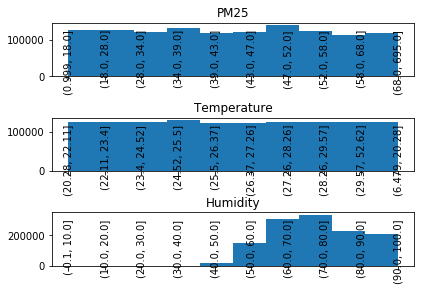

In [28]:
result = []
result.append(pd.qcut(q1['PM25'], 10))
#qcut is equal-frequency
result.append(pd.qcut(q1['Temperature'], 10))
result.append(pd.cut(q1['Humidity'], 10))
#cut is equal-width
fig, ax = plt.subplots(3,1)
#print(len(result))
#result[1]
#result[2]
for i in range(len(result)):
    #convert each interval-data to string in original result[i]
    #in order to input to hist()
    result[i] = [str(x) for x in result[i]] 
    #hist() can take Series/array/list of data
    #result[i] = np.array(result[i])
    ax[i].hist(result[i])
    ax[i].set_title(q1.columns[i+2])
    for tick in ax[i].get_xticklabels():
        tick.set_y(1)
        tick.set_rotation(90)
fig.tight_layout()
plt.show()

嘗試其他離散化方法，PM2.5的資料決定改用 k-means 的 cluster 方式 做 discretization。觀察分類過後的PM2.5分布，與環保署的PM2.5指標做比較

- [-3,22]、[23,39]為低濃度
- [40,54]為中濃度
- [55,75]為高濃度
- 剩餘>75為濃度非常高

認為此分類較為妥當

使用 KMeans 將 PM2.5 分成 5 群

In [29]:
X = q1[['PM25']]
#print(X)
Y = q1['PM25'].values.reshape(-1, 1)
#print(type(Y))
#print(Y)
#label : 0 - 4
#print("type(X) = {x}".format(x = type(X)))
kmeans = KMeans(n_clusters=5, random_state=0).fit(Y)
#kmeans = KMeans(n_clusters=5, random_state=0).fit(Y)
# Add a new column "PM25_cluster"
#print("type(kmeans) = {x}".format(x = type(kmeans)))
q1['PM25_cluster'] = kmeans.labels_
#q1[(q1['PM25_cluster'] == 0)] 
q1.head(20)


,record_id,device_id,PM25,Temperature,Humidity,PM25_cluster
0,12773,28C2DDDD415C,43,19.61,96,3
1,12774,28C2DDDD415C,41,19.81,94,1
2,12775,28C2DDDD415C,41,19.73,93,1
3,12776,28C2DDDD415C,47,19.17,92,3
4,12777,28C2DDDD415C,50,19.90,91,3
5,12778,28C2DDDD415C,44,20.09,90,3
6,12779,28C2DDDD415C,39,20.82,90,1
7,12780,28C2DDDD415C,48,21.23,87,3
8,12781,28C2DDDD415C,45,21.35,86,3
9,12782,28C2DDDD415C,48,21.62,85,3


In [30]:
X = q1[['PM25']]
#print(X)
Y = q1['PM25'].values.reshape(-1, 1)
#print(type(Y))
#print(Y)
#label : 0 - 4
#print("type(X) = {x}".format(x = type(X)))
#kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
kmeans = KMeans(n_clusters=5, random_state=0).fit(Y)
# Add a new column "PM25_cluster"
#print("type(kmeans) = {x}".format(x = type(kmeans)))
q1['PM25_cluster'] = kmeans.labels_
#q1[(q1['PM25_cluster'] == 0)] 
q1.head(20)

,record_id,device_id,PM25,Temperature,Humidity,PM25_cluster
0,12773,28C2DDDD415C,43,19.61,96,3
1,12774,28C2DDDD415C,41,19.81,94,1
2,12775,28C2DDDD415C,41,19.73,93,1
3,12776,28C2DDDD415C,47,19.17,92,3
4,12777,28C2DDDD415C,50,19.90,91,3
5,12778,28C2DDDD415C,44,20.09,90,3
6,12779,28C2DDDD415C,39,20.82,90,1
7,12780,28C2DDDD415C,48,21.23,87,3
8,12781,28C2DDDD415C,45,21.35,86,3
9,12782,28C2DDDD415C,48,21.62,85,3


將 cluster 的 label 轉換成區間

In [31]:
a = q1.groupby("PM25_cluster")['PM25'].max()
b = q1.groupby("PM25_cluster")['PM25'].min()
print("a = ")
print(a)
print("b = ")
print(b)

a = 
PM25_cluster
0     81
1     42
2     25
3     58
4    695
Name: PM25, dtype: int64
b = 
PM25_cluster
0    59
1    26
2     1
3    43
4    82
Name: PM25, dtype: int64


In [32]:
max_list = list(q1.groupby("PM25_cluster")['PM25'].max())
min_list = list(q1.groupby("PM25_cluster")['PM25'].min())
# min_list, max_list = zip(*sorted(zip(min_list, max_list)))

q1[['PM25_cluster']] = ["[%d, %d]" % (min_list[i], max_list[i]) for i in q1['PM25_cluster']]
q1.head()

,record_id,device_id,PM25,Temperature,Humidity,PM25_cluster
0,12773,28C2DDDD415C,43,19.61,96,"[43, 58]"
1,12774,28C2DDDD415C,41,19.81,94,"[26, 42]"
2,12775,28C2DDDD415C,41,19.73,93,"[26, 42]"
3,12776,28C2DDDD415C,47,19.17,92,"[43, 58]"
4,12777,28C2DDDD415C,50,19.90,91,"[43, 58]"


In [33]:
q1.groupby('PM25_cluster').count()

,record_id,device_id,PM25,Temperature,Humidity
PM25_cluster,,,,,
"[1, 25]",210602,210602,210602,210602,210602
"[26, 42]",389699,389699,389699,389699,389699
"[43, 58]",415725,415725,415725,415725,415725
"[59, 81]",184944,184944,184944,184944,184944
"[82, 695]",49473,49473,49473,49473,49473



### Step3: find rules by FP-growth algorithm

用 orange3-associate 提供的 FP-growth algorithm 找 discretization 後的資料中的 rules

- 挑出support > 100/總數的patterns
- 挑出confidence>0.5的rules

In [34]:
# 合併切過的資料
data_cut = []
pm25_items = ['PM25 ' + x for x in q1['PM25_cluster']]
temp_items = ['Temp ' + x for x in result[1]]
humd_items = ['Humd ' + x for x in result[2]]

data_cut.append(pm25_items)
data_cut.append(temp_items)
data_cut.append(humd_items)

# List 轉置
#每個item都是[PM25, TEMP, Humd]
transactions = list(zip(*data_cut))
print(transactions[0:2:1])

[('PM25 [43, 58]', 'Temp (6.479, 20.28]', 'Humd (90.0, 100.0]'), ('PM25 [26, 42]', 'Temp (6.479, 20.28]', 'Humd (90.0, 100.0]')]


#### Fp-growth
Orange3 的 fpgrowth 只能處理整數，所以需要寫一個 encoder 和 decoder 來互相轉換

In [35]:
test_1 = [(1, 2, 4), (2, 3, 4)]
test_1_untion = set().union(*test_1)
print(test_1_untion)

{1, 2, 3, 4}


In [36]:
from orangecontrib.associate import fpgrowth as fpg

start = time.time()
#將每一個item合在一起
itemset = set().union(*transactions)
#print(itemset)
decoder = {i: k for i, k in enumerate(itemset)}
encoder = {k: i for i, k in enumerate(itemset)}

#100 is the min-support
itemsets =  dict(fpg.frequent_itemsets([[encoder[i] for i in t] for t in transactions], 100/len(transactions)))
#list those rules that confidence > 0.5
rules = list(fpg.association_rules(itemsets, .5))

print("Fpgrowth took", time.time() - start, "seconds.")
print(len(rules), "Results")

Fpgrowth took 5.931546211242676 seconds.
11 Results


In [37]:
for rule in rules:
    a = [decoder[i] for i in rule[0]]
    b = [decoder[i] for i in rule[1]]
    s, c = rule[2], rule[3]
    print(a, ' -> ', b, c)
    
#a -> b is the association rule
#c is the confidence

['Temp (6.479, 20.28]', 'PM25 [82, 695]']  ->  ['Humd (90.0, 100.0]'] 0.518560606060606
['Temp (6.479, 20.28]', 'Humd (40.0, 50.0]']  ->  ['PM25 [1, 25]'] 0.8547008547008547
['Temp (29.57, 52.62]', 'Humd (40.0, 50.0]']  ->  ['PM25 [26, 42]'] 0.6000280780569984
['Temp (28.26, 29.57]', 'Humd (40.0, 50.0]']  ->  ['PM25 [26, 42]'] 0.5246191994332271
['PM25 [1, 25]', 'Humd (30.0, 40.0]']  ->  ['Temp (29.57, 52.62]'] 0.5310344827586206
['PM25 [43, 58]', 'Humd (30.0, 40.0]']  ->  ['Temp (29.57, 52.62]'] 0.8321167883211679
['PM25 [26, 42]', 'Humd (30.0, 40.0]']  ->  ['Temp (29.57, 52.62]'] 0.8376068376068376
['Temp (29.57, 52.62]', 'Humd (30.0, 40.0]']  ->  ['PM25 [26, 42]'] 0.6380208333333334
['Humd (40.0, 50.0]']  ->  ['PM25 [26, 42]'] 0.5156440256233786
['Humd (30.0, 40.0]']  ->  ['Temp (29.57, 52.62]'] 0.7492682926829268
['Humd (30.0, 40.0]']  ->  ['PM25 [26, 42]'] 0.5707317073170731


In [38]:
decoder

{0: 'Temp (23.4, 24.52]',
 1: 'Humd (70.0, 80.0]',
 2: 'PM25 [1, 25]',
 3: 'Temp (29.57, 52.62]',
 4: 'Temp (22.11, 23.4]',
 5: 'Humd (90.0, 100.0]',
 6: 'PM25 [82, 695]',
 7: 'Humd (10.0, 20.0]',
 8: 'Humd (80.0, 90.0]',
 9: 'Humd (60.0, 70.0]',
 10: 'Temp (24.52, 25.5]',
 11: 'Temp (6.479, 20.28]',
 12: 'Temp (20.28, 22.11]',
 13: 'Temp (27.26, 28.26]',
 14: 'Humd (30.0, 40.0]',
 15: 'Humd (50.0, 60.0]',
 16: 'Temp (26.37, 27.26]',
 17: 'PM25 [43, 58]',
 18: 'Temp (25.5, 26.37]',
 19: 'PM25 [59, 81]',
 20: 'Humd (-0.1, 10.0]',
 21: 'PM25 [26, 42]',
 22: 'Temp (28.26, 29.57]',
 23: 'Humd (40.0, 50.0]',
 24: 'Humd (20.0, 30.0]'}

In [39]:
encoder

{'Humd (-0.1, 10.0]': 20,
 'Humd (10.0, 20.0]': 7,
 'Humd (20.0, 30.0]': 24,
 'Humd (30.0, 40.0]': 14,
 'Humd (40.0, 50.0]': 23,
 'Humd (50.0, 60.0]': 15,
 'Humd (60.0, 70.0]': 9,
 'Humd (70.0, 80.0]': 1,
 'Humd (80.0, 90.0]': 8,
 'Humd (90.0, 100.0]': 5,
 'PM25 [1, 25]': 2,
 'PM25 [26, 42]': 21,
 'PM25 [43, 58]': 17,
 'PM25 [59, 81]': 19,
 'PM25 [82, 695]': 6,
 'Temp (20.28, 22.11]': 12,
 'Temp (22.11, 23.4]': 4,
 'Temp (23.4, 24.52]': 0,
 'Temp (24.52, 25.5]': 10,
 'Temp (25.5, 26.37]': 18,
 'Temp (26.37, 27.26]': 16,
 'Temp (27.26, 28.26]': 13,
 'Temp (28.26, 29.57]': 22,
 'Temp (29.57, 52.62]': 3,
 'Temp (6.479, 20.28]': 11}

### Step 4: Explantion

- 溼度低 (30 ~ 40) 且 PM2.5 為中、高濃度時，溫度常會偏高 (> 30)
- 溼度偏低 (40 ~ 50) 且 溫度低 (6 ~ 20) 時，PM2.5 常為中濃度
- 溼度低 (30 ~ 40) 時，溫度常會偏高 (> 30)

##  Task 2 - (Temperature, Humidity, PM2.5, PM2.5_future)

### Step 1: Transaction Definition
觀察當下的 Temperature & Humidity 與兩個小時後的 PM2.5 關聯

In [40]:
q2 = data.drop(['DateTime', 'PM25', 'PM10', 'PM1', 'lat', 'lon'], axis=1)
q2['PM25_cluster'] = q1['PM25_cluster']
q2.tail()

,record_id,device_id,Temperature,Humidity,PM25_cluster
1250438,1727166,74DA38B05374,26.12,53,"[26, 42]"
1250439,1727167,74DA38B05374,26.00,53,"[1, 25]"
1250440,1727168,74DA38B05374,25.87,53,"[26, 42]"
1250441,1727169,74DA38B05374,25.75,52,"[26, 42]"
1250442,1727170,74DA38B05374,25.38,52,"[26, 42]"


因為此份資料集，每個感測器的資料是按照時間排序的，因此可以直接使用 shift 來建構發票

將 PM25_cluster 的欄位 shift 一個，並新增 PM_cluster_fut 欄位，使得每個 row 變成一筆資料(一張發票)，每張發票為 (溫度，濕度，PM2.5，未來 30 分鐘的 PM2.5)

In [41]:
#每30分鐘一筆, 對時間是連續得, 所以往左移動一格當作是猜測的未來資料
#最後一筆資料可丟掉
q2['PM25_cluster_fut'] = q2['PM25_cluster'].shift(-1)
q2.tail()

,record_id,device_id,Temperature,Humidity,PM25_cluster,PM25_cluster_fut
1250438,1727166,74DA38B05374,26.12,53,"[26, 42]","[1, 25]"
1250439,1727167,74DA38B05374,26.00,53,"[1, 25]","[26, 42]"
1250440,1727168,74DA38B05374,25.87,53,"[26, 42]","[26, 42]"
1250441,1727169,74DA38B05374,25.75,52,"[26, 42]","[26, 42]"
1250442,1727170,74DA38B05374,25.38,52,"[26, 42]",NaN


In [42]:
q2.groupby("device_id").tail(2)

,record_id,device_id,Temperature,Humidity,PM25_cluster,PM25_cluster_fut
1469,14242,28C2DDDD415C,19.12,93,"[1, 25]","[1, 25]"
1470,14243,28C2DDDD415C,19.32,94,"[1, 25]","[1, 25]"
2738,15511,28C2DDDD415F,28.37,63,"[1, 25]","[1, 25]"
2739,15512,28C2DDDD415F,28.37,63,"[1, 25]","[1, 25]"
4209,26999,28C2DDDD423C,25.75,75,"[1, 25]","[1, 25]"
4210,27000,28C2DDDD423C,25.75,75,"[1, 25]","[1, 25]"
5241,33021,28C2DDDD42C7,23.84,70,"[1, 25]","[1, 25]"
5242,33022,28C2DDDD42C7,23.75,70,"[1, 25]","[59, 81]"
6509,34289,28C2DDDD42F7,21.17,72,"[1, 25]","[1, 25]"
6510,34290,28C2DDDD42F7,21.36,71,"[1, 25]","[26, 42]"


然而，每個感測器的最後一筆資料為無用的資料(因為 shift 會導致後一個感測器的第一筆資料移到前一個感測器的最後一筆，會使得該筆資料並非前後三十分鐘的關係)

所以需要刪除掉每個感測器的最後一筆資料，首先可以先將所有感測器最後一筆資料的 record_id 找出來

In [43]:
#找每個sensor最後一筆record_id
q2.groupby("device_id").tail(1)['record_id'].head(10)

1470     14243
2739     15512
4210     27000
5242     33022
6510     34290
7779     40126
9245     47413
10673    48841
12144    50312
13057    69831
Name: record_id, dtype: int64

上述的方法可以找出每個感測器最後一筆資料的 record_id，這邊可以暫時視他為 t 集合，而我們的目標是不要選取這些資料，所以可以使用 isin 來選出資料集內所有 record_id 在 t 集合內的資料(也就是代表，選出所有感測器的最後一筆資料)，再搭配 ~ 反選取語法，即可得到我們要的結果

In [44]:
#~ : 如果最後一筆record_id在上面的list裡就不選
q2 = q2[~q2['record_id'].isin(q2.groupby("device_id").tail(1)['record_id'])]

In [45]:
q2.tail()

,record_id,device_id,Temperature,Humidity,PM25_cluster,PM25_cluster_fut
1250437,1727165,74DA38B05374,26.25,53,"[26, 42]","[26, 42]"
1250438,1727166,74DA38B05374,26.12,53,"[26, 42]","[1, 25]"
1250439,1727167,74DA38B05374,26.00,53,"[1, 25]","[26, 42]"
1250440,1727168,74DA38B05374,25.87,53,"[26, 42]","[26, 42]"
1250441,1727169,74DA38B05374,25.75,52,"[26, 42]","[26, 42]"


### Step 2: Observation & Discretization
與前一個 Task 一樣

### Step3: find rules by FP-growth algorithm

用 orange3-associate 提供的 FP-growth algorithm 找 discretization 後的資料中的 rules

- 挑出support > 1000/總數的patterns
- 挑出confidence > 0.7 的 rules

In [46]:
result = []
result.append(pd.qcut(q2['Temperature'], 10))
result.append(pd.cut(q2['Humidity'], 10))

# 合併切過的資料
data_cut = []
pm25_fut_items = ['PM25_FUT ' + x for x in q2['PM25_cluster_fut']]
pm25_items = ['PM25 ' + x for x in q2['PM25_cluster']]
temp_items = ['Temp ' + str(x) for x in result[0]]
humd_items = ['Humd ' + str(x) for x in result[1]]
#     print('PM25 %d' % i, end='\r')
data_cut.append(pm25_fut_items)
data_cut.append(pm25_items)
data_cut.append(temp_items)
data_cut.append(humd_items)
transactions = list(zip(*data_cut))

#### Fp-growth

In [47]:
from orangecontrib.associate import fpgrowth as fpg

start = time.time()
itemset = set().union(*transactions)
decoder = {i: k for i, k in enumerate(itemset)}
encoder = {k: i for i, k in enumerate(itemset)}


itemsets =  dict(fpg.frequent_itemsets([[encoder[i] for i in t] for t in transactions], 10000/len(transactions)))
rules = list(fpg.association_rules(itemsets, .7))

In [48]:
print("Fpgrowth took", time.time() - start, "seconds.")
print(len(rules), "Results")
for rule in rules:
    a = [decoder[i] for i in rule[0]]
    b = [decoder[i] for i in rule[1]]
    s, c = rule[2], rule[3]
    print(a, ' -> ', b, c)


Fpgrowth took 5.7719948291778564 seconds.
164 Results
['Humd (70.0, 80.0]', 'Temp (24.53, 25.5]', 'PM25 [43, 58]']  ->  ['PM25_FUT [43, 58]'] 0.855686274509804
['Humd (70.0, 80.0]', 'PM25_FUT [43, 58]', 'Temp (24.53, 25.5]']  ->  ['PM25 [43, 58]'] 0.8620788736441347
['PM25 [1, 25]', 'Temp (6.479, 20.28]', 'Humd (90.0, 100.0]']  ->  ['PM25_FUT [1, 25]'] 0.9145132593408456
['PM25_FUT [1, 25]', 'Temp (6.479, 20.28]', 'Humd (90.0, 100.0]']  ->  ['PM25 [1, 25]'] 0.911886457717327
['Humd (70.0, 80.0]', 'Temp (6.479, 20.28]', 'PM25 [43, 58]']  ->  ['PM25_FUT [43, 58]'] 0.8686502802932299
['Humd (70.0, 80.0]', 'PM25_FUT [43, 58]', 'Temp (6.479, 20.28]']  ->  ['PM25 [43, 58]'] 0.871280276816609
['Humd (70.0, 80.0]', 'PM25 [43, 58]', 'Temp (20.28, 22.11]']  ->  ['PM25_FUT [43, 58]'] 0.8676268861454046
['Humd (70.0, 80.0]', 'PM25_FUT [43, 58]', 'Temp (20.28, 22.11]']  ->  ['PM25 [43, 58]'] 0.8685204256779951
['Humd (70.0, 80.0]', 'Temp (28.26, 29.57]', 'PM25 [43, 58]']  ->  ['PM25_FUT [43, 58]'] 

### Step 4: Explantion
- 未來 30 分鐘的 PM2.5 跟當前的 PM2.5 通常會落在同一個區間
- 看起來沒有其他特殊的發現

##  Task 3 - (PM2.5, PM10, PM1, loc)

### Step 1: Transaction Definition
找出 PM2.5, PM10, PM1 及座標之間的關係

In [49]:
q3 = data.drop(['DateTime', 'Temperature', 'Humidity', 'PM25'], axis=1)
q3['PM25_cluster'] = q1['PM25_cluster']

### Step 2: Observation & Discretization
觀察各 features 的分佈

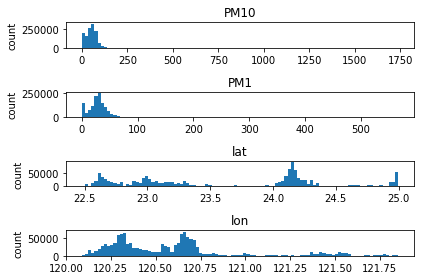

In [50]:
fig, ax = plt.subplots(nrows=4)
features = ['PM10', 'PM1', 'lat', 'lon']
for i, f in enumerate(features):
    ax[i].hist(q3[f], bins=100)
    ax[i].set_title(f)
    ax[i].set_ylabel('count')


fig.tight_layout()
plt.show()



#### PM10, PM1 選用 equal-frequency 離散化

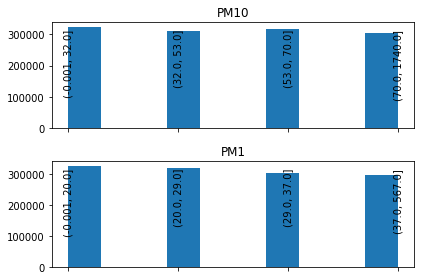

In [51]:
result = []
result.append(pd.qcut(q3['PM10'], 4))
result.append(pd.qcut(q3['PM1'], 4))

fig, ax = plt.subplots(2,1)
for i in range(len(result)):
    result[i] = list(map(lambda x: str(x), result[i]))
    ax[i].hist(result[i])
    ax[i].set_title(q3.columns[i + 2])
    for tick in ax[i].get_xticklabels():
        tick.set_y(1)
        tick.set_rotation(90)
fig.tight_layout()
plt.show()
result = pd.DataFrame(list(zip(*result)))

#### 經緯度屬於座標資訊，選用 KMeans Clustering 離散化

In [52]:
X = q3[['lat', 'lon']]
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
q3['loc_cluster'] = kmeans.labels_

In [53]:
q3.head()

,record_id,device_id,PM10,PM1,lat,lon,PM25_cluster,loc_cluster
0,12773,28C2DDDD415C,0,0,23.741,120.755,"[43, 58]",1
1,12774,28C2DDDD415C,0,0,23.741,120.755,"[26, 42]",1
2,12775,28C2DDDD415C,0,0,23.741,120.755,"[26, 42]",1
3,12776,28C2DDDD415C,0,0,23.741,120.755,"[43, 58]",1
4,12777,28C2DDDD415C,0,0,23.741,120.755,"[43, 58]",1


#### 各 cluster 數量統計

In [54]:
q3.groupby('loc_cluster')['record_id'].count()

loc_cluster
0    339281
1    486807
2    133922
3    290433
Name: record_id, dtype: int64

#### 選用每個感測器的第1筆資料的座標資訊繪圖

In [105]:
q3[(q3['device_id'] == '28C2DDDD415C')]

,record_id,device_id,PM10,PM1,lat,lon,PM25_cluster,loc_cluster
0,12773,28C2DDDD415C,0,0,23.741,120.755,"[43, 58]",1
1,12774,28C2DDDD415C,0,0,23.741,120.755,"[26, 42]",1
2,12775,28C2DDDD415C,0,0,23.741,120.755,"[26, 42]",1
3,12776,28C2DDDD415C,0,0,23.741,120.755,"[43, 58]",1
4,12777,28C2DDDD415C,0,0,23.741,120.755,"[43, 58]",1
5,12778,28C2DDDD415C,0,0,23.741,120.755,"[43, 58]",1
6,12779,28C2DDDD415C,0,0,23.741,120.755,"[26, 42]",1
7,12780,28C2DDDD415C,0,0,23.741,120.755,"[43, 58]",1
8,12781,28C2DDDD415C,0,0,23.741,120.755,"[43, 58]",1
9,12782,28C2DDDD415C,0,0,23.741,120.755,"[43, 58]",1


In [91]:
device_loc_df = q3.groupby('device_id')[['lat', 'lon', 'loc_cluster']]
#group_keys = device_loc_df.groups.keys()
#print(group_keys)
device_loc_df.mean()


,lat,lon,loc_cluster
device_id,,,
28C2DDDD415C,23.741,120.755,1
28C2DDDD415F,22.996,120.222,0
28C2DDDD423C,24.990,121.576,2
28C2DDDD42C7,24.983,121.534,2
28C2DDDD42F7,24.998,121.539,2
28C2DDDD4343,23.482,120.463,0
28C2DDDD4354,24.990,121.570,2
28C2DDDD4357,24.987,121.550,2
28C2DDDD435A,24.999,121.559,2


In [55]:
device_loc_df = q3.groupby('device_id')[['lat', 'lon', 'loc_cluster']]
print(type(device_loc_df))
#print(device_loc_df.head())
#device_loc_df.head()
device_loc_df.first()

<class 'pandas.core.groupby.DataFrameGroupBy'>


,lat,lon,loc_cluster
device_id,,,
28C2DDDD415C,23.741,120.755,1
28C2DDDD415F,22.996,120.222,0
28C2DDDD423C,24.990,121.576,2
28C2DDDD42C7,24.983,121.534,2
28C2DDDD42F7,24.998,121.539,2
28C2DDDD4343,23.482,120.463,0
28C2DDDD4354,24.990,121.570,2
28C2DDDD4357,24.987,121.550,2
28C2DDDD435A,24.999,121.559,2


In [106]:
device_loc_df = q3.groupby('device_id')[['lat', 'lon', 'loc_cluster']].first()
device_loc_df.head(100)

,lat,lon,loc_cluster
device_id,,,
28C2DDDD415C,23.741,120.755,1
28C2DDDD415F,22.996,120.222,0
28C2DDDD423C,24.990,121.576,2
28C2DDDD42C7,24.983,121.534,2
28C2DDDD42F7,24.998,121.539,2
28C2DDDD4343,23.482,120.463,0
28C2DDDD4354,24.990,121.570,2
28C2DDDD4357,24.987,121.550,2
28C2DDDD435A,24.999,121.559,2


In [108]:
device_loc_df = q3.groupby('device_id')[['lat', 'lon', 'loc_cluster']].mean()
device_loc_df.head(len(device_loc_df))

,lat,lon,loc_cluster
device_id,,,
28C2DDDD415C,23.741,120.755,1
28C2DDDD415F,22.996,120.222,0
28C2DDDD423C,24.990,121.576,2
28C2DDDD42C7,24.983,121.534,2
28C2DDDD42F7,24.998,121.539,2
28C2DDDD4343,23.482,120.463,0
28C2DDDD4354,24.990,121.570,2
28C2DDDD4357,24.987,121.550,2
28C2DDDD435A,24.999,121.559,2


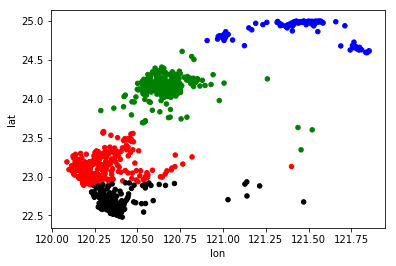

In [57]:
color = ['r', 'g', 'b', 'k']
loc_color = [color[i] for i in list(device_loc_df['loc_cluster'])]
device_loc_df.plot("lon", "lat",kind="scatter", color=loc_color)

因為東部地形狹長，且感測器數量過少，無法正確分成北中南東四群，但北中南感測器有被分出來，結果大致上可以接受。

### Step3: find rules by FP-growth algorithm

用 orange3-associate 提供的 FP-growth algorithm 找 discretization 後的資料中的 rules

- 挑出support > 100000/總數的patterns
- 挑出confidence>0.7的rules

In [58]:
# 合併切過的資料
data_cut = []
pm25_items = ['PM25 ' + x for x in q3['PM25_cluster']]
loc_items = ['LOC ' + str(x) for x in q3['loc_cluster']]
pm10_items = ['PM10 ' + x for x in result[0]]
pm1_items = ['PM1 ' + x for x in result[1]]
#     print('PM25 %d' % i, end='\r')
data_cut.append(pm25_items)
data_cut.append(pm10_items)
data_cut.append(pm1_items)
data_cut.append(loc_items)
transactions = list(zip(*data_cut))

#### Fp-growth

In [59]:
from orangecontrib.associate import fpgrowth as fpg

start = time.time()

itemset = set().union(*transactions)
decoder = {i: k for i, k in enumerate(itemset)}
encoder = {k: i for i, k in enumerate(itemset)}


freqsets =  dict(fpg.frequent_itemsets([[encoder[i] for i in t] for t in transactions], 100000/len(transactions)))
rules = list(fpg.association_rules(freqsets, .7))

print("Fpgrowth took", time.time() - start, "seconds.")
print(len(rules), "Results")
for rule in rules:
    a = [decoder[i] for i in rule[0]]
    b = [decoder[i] for i in rule[1]]
    s, c = rule[2], rule[3]
    print(a, ' -> ', b, c)

Fpgrowth took 4.436861038208008 seconds.
69 Results
['PM25 [26, 42]', 'LOC 1', 'PM1 (20.0, 29.0]']  ->  ['PM10 (32.0, 53.0]'] 0.9121876398031572
['PM10 (32.0, 53.0]', 'LOC 1', 'PM1 (20.0, 29.0]']  ->  ['PM25 [26, 42]'] 0.9961381877399093
['LOC 1', 'PM1 (20.0, 29.0]']  ->  ['PM10 (32.0, 53.0]', 'PM25 [26, 42]'] 0.8602972200084384
['PM25 [26, 42]', 'PM10 (32.0, 53.0]', 'LOC 1']  ->  ['PM1 (20.0, 29.0]'] 0.9253893699482761
['PM10 (32.0, 53.0]', 'LOC 1']  ->  ['PM25 [26, 42]', 'PM1 (20.0, 29.0]'] 0.8973782195924469
['LOC 1', 'PM25 [26, 42]']  ->  ['PM10 (32.0, 53.0]', 'PM1 (20.0, 29.0]'] 0.7681043297317013
['PM25 [43, 58]', 'LOC 1', 'PM1 (29.0, 37.0]']  ->  ['PM10 (53.0, 70.0]'] 0.88682875104143
['PM10 (53.0, 70.0]', 'LOC 1', 'PM1 (29.0, 37.0]']  ->  ['PM25 [43, 58]'] 0.9879509939586216
['LOC 1', 'PM1 (29.0, 37.0]']  ->  ['PM10 (53.0, 70.0]', 'PM25 [43, 58]'] 0.8411312974576697
['PM10 (53.0, 70.0]', 'LOC 1']  ->  ['PM25 [43, 58]', 'PM1 (29.0, 37.0]'] 0.8319927237586334
['PM10 (53.0, 70.0]'

### Step 4: Explantion 
- LOC 2 (北部) 的 PM10, PM1 都偏低
- LOC 0 (南部) 在 PM10 (PM1) 很高的時候，PM1 (PM10) 也會很高
- PM1 與 PM10 有正相關性

# Data 2 - Weather
- 從 2016-07-03 到 2017-07-03 的天氣資料
- 29 個地點
- 每小時一筆資料

In [60]:
weather = pd.read_csv("weather.csv")
weather.head()

,Location,Date,Time,測站氣壓,溫度,相對溼度,風速,風向,降水量,日照時數
0,"BANQIAO,板橋",2016-07-03,01:00,1009.6,25.3,83.0,1.0,"南南西,SSW",0.0,NaN
1,"BANQIAO,板橋",2016-07-03,02:00,1009.0,25.1,84.0,0.2,"靜風,Calm",0.0,NaN
2,"BANQIAO,板橋",2016-07-03,03:00,1008.6,25.1,84.0,0.2,"靜風,Calm",0.0,NaN
3,"BANQIAO,板橋",2016-07-03,04:00,1009.0,25.0,85.0,0.8,"南南西,SSW",0.0,NaN
4,"BANQIAO,板橋",2016-07-03,05:00,1009.5,24.8,85.0,0.6,"西南,WS",0.0,NaN


# Data 3 - Power
- 從 2016-09-27 到 2017-09-01 的電力資料
- 北中南東各有兩個 columns ， 分別代表供給量及使用量 (Supply & Usage)
- 約每小時一筆資料

In [61]:
power = pd.read_csv("power.csv")
power.head()

,Date,Time,NorthSupply,NorthUsage,CenterSupply,CenterUsage,SouthSupply,SouthUsage,EastSupply,EastUsage
0,2016-09-27,12:10,648.4,841.3,733.0,564.4,839.6,799.9,14.0,29.3
1,2016-09-27,13:10,601.3,826.4,725.4,535.9,827.3,777.9,14.0,27.6
2,2016-09-27,14:00,500.9,789.5,759.0,506.7,821.5,771.3,13.9,27.9
3,2016-09-27,15:10,516.1,773.6,717.1,450.8,744.2,737.3,13.9,29.5
4,2016-09-27,16:00,530.2,778.0,691.6,432.2,746.0,735.3,8.7,31.0
